# BUSINESS PROCESS AND DATA ANALYSIS

# Step 1: Import Required Libraries and Files

In [19]:
!pip install pandas matplotlib geopandas openpyxl

In [15]:
from google.colab import files
uploaded = files.upload()
for file_name in uploaded.keys():
    print(f"Uploaded file: {file_name}, Path: /content/{file_name}")

Saving ne_110m_admin_0_countries.zip to ne_110m_admin_0_countries (2).zip
Uploaded file: ne_110m_admin_0_countries (2).zip, Path: /content/ne_110m_admin_0_countries (2).zip


In [17]:
import pandas as pd
csv_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR-fuNCzGRF4XZihTxy3w3ub_Q6xefZSoI2-c34kksD35OLXovf1YIH29fm_K70-7ODc0F29XYK2Ymz/pub?output=csv"
data = pd.read_csv(csv_url)
print(data.head())

   Year  Number of KFC Restaurants Worldwide  \
0  2019                                24104   
1  2020                                25000   
2  2021                                26934   
3  2022                                27760   
4  2023                                29900   

   Customer Satisfaction Index in America  Annual Revenue in $ billion  \
0                                      78                       27.900   
1                                      79                       26.289   
2                                      79                       31.365   
3                                      78                       31.116   
4                                      81                       33.860   

   Net Profit in $ Million  
0                    12.20  
1                    13.70  
2                    15.02  
3                    11.99  
4                     6.85  


# Step 2: Load the Excel File

In [20]:
import pandas as pd

# Define the file path to the Excel file
file_path = "MHA 2216.xlsx"

# Load the Excel file and parse the sheets
excel_data = pd.ExcelFile(file_path)
data_sheet = excel_data.parse('Data')
geo_distribution_sheet = excel_data.parse('Geographical Distribution')

# Preview the data
print(data_sheet.head())
print(geo_distribution_sheet.head())


   Year  Number of KFC Restaurants Worldwide  \
0  2019                                24104   
1  2020                                25000   
2  2021                                26934   
3  2022                                27760   
4  2023                                29900   

   Customer Satisfaction Index in America  Annual Revenue in $ billion  \
0                                      78                       27.900   
1                                      79                       26.289   
2                                      79                       31.365   
3                                      78                       31.116   
4                                      81                       33.860   

   Net Profit in $ Million  
0                    12.20  
1                    13.70  
2                    15.02  
3                    11.99  
4                     6.85  
  Country Code  Country Names  Number of Restaurants
0          ZMB         Zambia          

# Step 3: Visualize Geographical Distribution of KFC Restaurants

In [25]:
!pip install geopandas matplotlib shapely

<ipython-input-29-de990dfaafd9>:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(world.geometry.centroid.x, world.geometry.centroid.y, world['Number of Restaurants']):


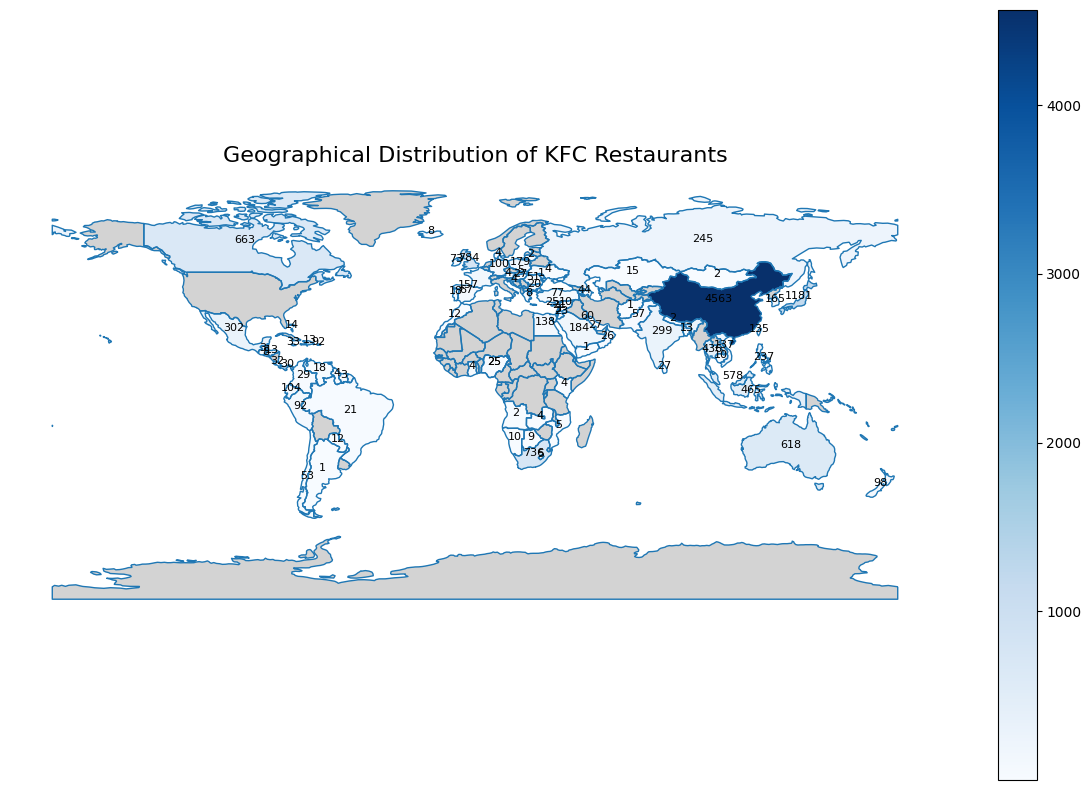

In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
world = gpd.read_file('/content/ne_110m_admin_0_countries (2).zip')
geo_distribution_cleaned = geo_distribution_sheet.dropna()
world = world.merge(geo_distribution_cleaned, left_on='ADMIN', right_on='Country Names', how='left')
#world map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='Number of Restaurants', ax=ax, cmap='Blues', legend=True,
           missing_kwds={"color": "lightgrey", "label": "No data"})

# labels for countries
for x, y, label in zip(world.geometry.centroid.x, world.geometry.centroid.y, world['Number of Restaurants']):
    if pd.notna(label):
        ax.text(x, y, int(label), fontsize=8, ha='center', color='black')

plt.title('Geographical Distribution of KFC Restaurants', fontsize=16)
ax.set_axis_off()
plt.show()

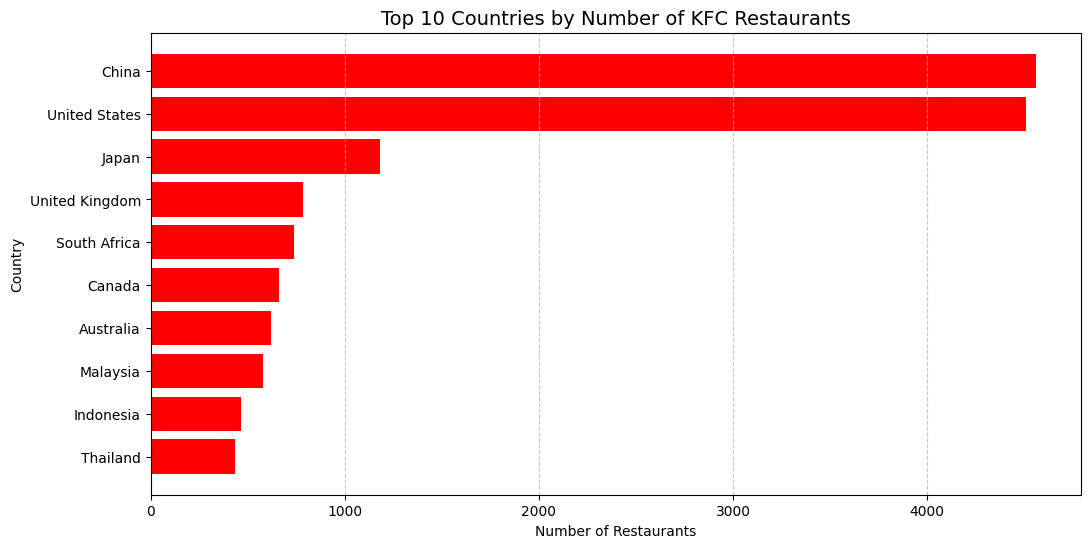

In [22]:
import matplotlib.pyplot as plt

# Clean and sort geographical data
geo_distribution_cleaned = geo_distribution_sheet.dropna()
geo_top_10 = geo_distribution_cleaned.sort_values(by='Number of Restaurants', ascending=False).head(10)

# Bar chart
plt.figure(figsize=(12, 6))
plt.barh(geo_top_10['Country Names'], geo_top_10['Number of Restaurants'], color='red')
plt.xlabel('Number of Restaurants')
plt.ylabel('Country')
plt.title('Top 10 Countries by Number of KFC Restaurants', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# Step 4: Plot Changes in the Number of Restaurants (2019-2023)

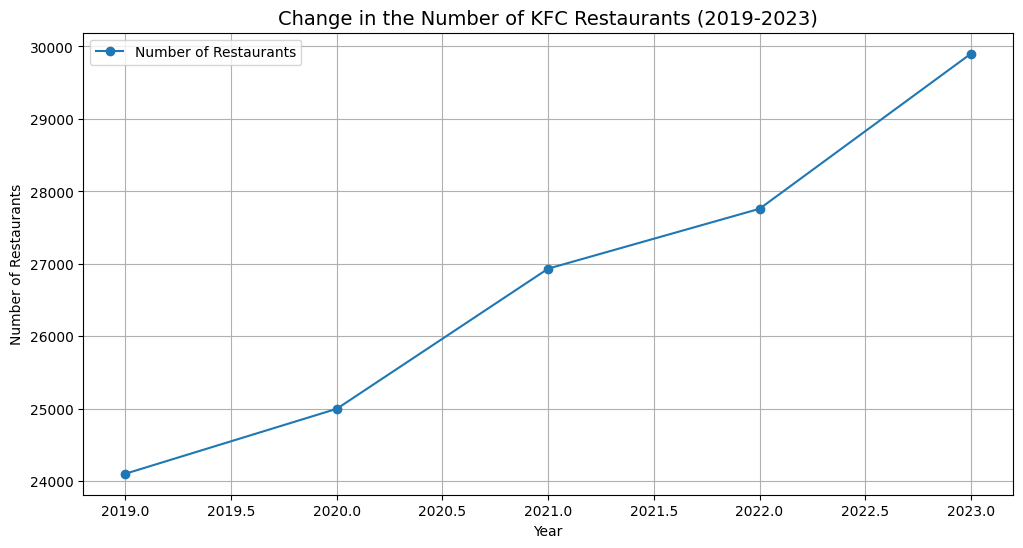

In [23]:
# Line plot for the number of restaurants
plt.figure(figsize=(12, 6))
plt.plot(data_sheet['Year'], data_sheet['Number of KFC Restaurants Worldwide'], marker='o', label='Number of Restaurants')
plt.title('Change in the Number of KFC Restaurants (2019-2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Restaurants')
plt.grid(True)
plt.legend()
plt.show()

# change in the customer satisfaction Index for KFC

# Step 6: Plot Annual Revenue and Net Profit

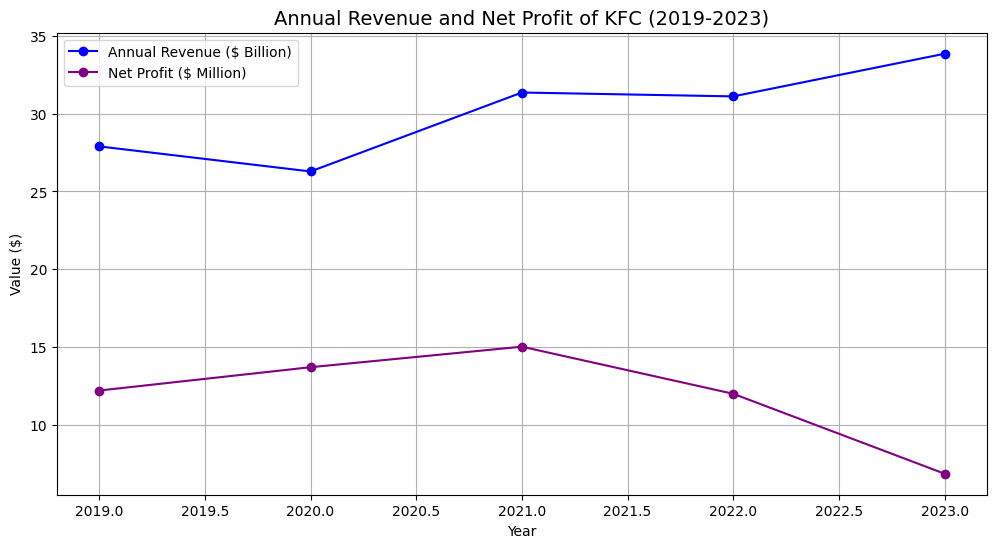

In [24]:
#annual revenue and net profit
plt.figure(figsize=(12, 6))
plt.plot(data_sheet['Year'], data_sheet['Annual Revenue in $ billion'], marker='o', color='blue', label='Annual Revenue ($ Billion)')
plt.plot(data_sheet['Year'], data_sheet['Net Profit in $ Million'], marker='o', color='purple', label='Net Profit ($ Million)')
plt.title('Annual Revenue and Net Profit of KFC (2019-2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Value ($)')
plt.grid(True)
plt.legend()
plt.show()

# Customer Satisfaction Analysis

   Year  Customer Satisfaction Index in America  Change (%)
0  2019                                      78         NaN
1  2020                                      79    1.282051
2  2021                                      79    0.000000
3  2022                                      78   -1.265823
4  2023                                      81    3.846154


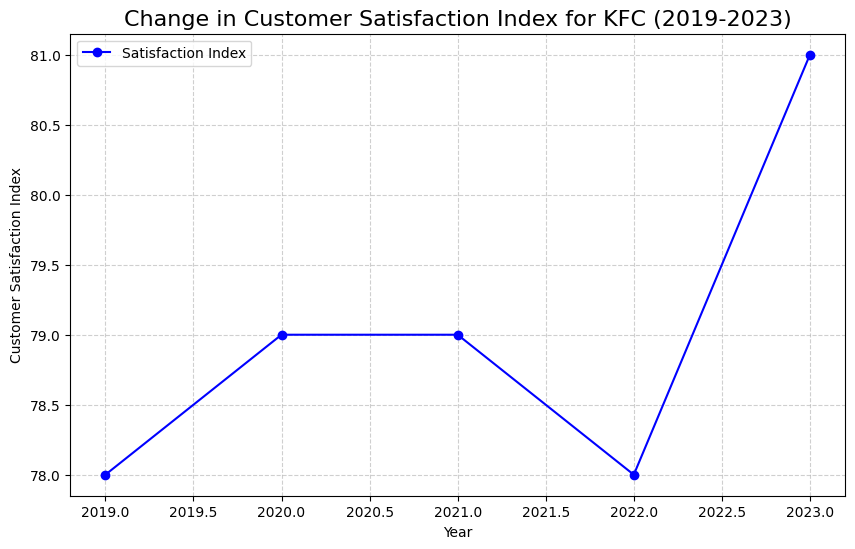

In [30]:
csv_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR-fuNCzGRF4XZihTxy3w3ub_Q6xefZSoI2-c34kksD35OLXovf1YIH29fm_K70-7ODc0F29XYK2Ymz/pub?output=csv"
satisfaction_data = pd.read_csv(csv_url)

# Filter relevant years
satisfaction_data = satisfaction_data[['Year', 'Customer Satisfaction Index in America']]
satisfaction_data = satisfaction_data[satisfaction_data['Year'].between(2019, 2023)]

# Calculate percentage change
satisfaction_data['Change (%)'] = satisfaction_data['Customer Satisfaction Index in America'].pct_change() * 100

# Print the data
print(satisfaction_data)

# Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(satisfaction_data['Year'], satisfaction_data['Customer Satisfaction Index in America'], marker='o', color='blue', label='Satisfaction Index')
plt.title('Change in Customer Satisfaction Index for KFC (2019-2023)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Customer Satisfaction Index')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()
